In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
# Importing dataset
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217143 entries, 0 to 217142
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           217143 non-null  object 
 1   Location       217143 non-null  object 
 2   MinTemp        213597 non-null  float64
 3   MaxTemp        213784 non-null  float64
 4   Rainfall       210781 non-null  float64
 5   Evaporation    101279 non-null  float64
 6   Sunshine       92165 non-null   float64
 7   WindGustDir    200813 non-null  object 
 8   WindGustSpeed  200920 non-null  float64
 9   WindDir9am     200103 non-null  object 
 10  WindDir3pm     207905 non-null  object 
 11  WindSpeed9am   212983 non-null  float64
 12  WindSpeed3pm   209412 non-null  float64
 13  Humidity9am    212294 non-null  float64
 14  Humidity3pm    208212 non-null  float64
 15  Pressure9am    193119 non-null  float64
 16  Pressure3pm    193138 non-null  float64
 17  Cloud9am       123473 non-nul

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,213597.000000,213784.000000,210781.000000,101279.000000,92165.000000,200920.000000,212983.000000,209412.000000,212294.000000,208212.000000,193119.000000,193138.000000,123473.000000,117663.000000,213519.000000,209360.000000,210782.000000
mean,12.013287,23.132537,2.333787,5.489808,7.617073,40.029041,14.035618,18.581447,68.979076,51.399818,1017.731120,1015.304954,4.655536,4.653697,16.837248,21.613194,2.333630
std,6.437902,7.139490,8.547405,4.226591,3.771815,13.577398,8.886909,8.738994,19.516599,21.083946,7.062112,7.015274,2.897432,2.757064,6.536444,6.993169,8.547207
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,7.400000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.000000,1010.500000,1.000000,2.000000,12.100000,16.500000,0.000000
50%,11.800000,22.500000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.700000,1015.200000,6.000000,5.000000,16.600000,21.000000,0.000000
75%,16.700000,28.100000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,84.000000,66.000000,1022.600000,1020.200000,7.000000,7.000000,21.400000,26.300000,0.600000
max,33.900000,48.900000,474.000000,138.700000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,474.000000


In [5]:

# Drop columns with large amounts of missing data and redundant information
df.drop('Date',axis=1,inplace=True)
df.drop('Location',axis=1,inplace=True)
df.drop('Cloud9am',axis=1,inplace=True)
df.drop('Cloud3pm',axis=1,inplace=True)
df.drop('Evaporation', axis=1, inplace=True)
df.drop('Sunshine',axis=1,inplace=True)
df.drop('RISK_MM',axis=1,inplace=True)

df["AverageTemp"] = (df["MinTemp"] +  df["MaxTemp"] ) /2
df.drop('MinTemp', axis=1, inplace=True)
df.drop('MaxTemp', axis=1, inplace=True)

# Pre Processs
df_Pre = pd.get_dummies(data=df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'])
df_Pre.replace(['No','Yes'], [0,1],inplace=True)

df_Pre = df_Pre.astype(float)

In [6]:
df.head()


,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,AverageTemp
0,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,18.15
1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,16.25
2,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,19.30
3,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,18.60
4,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,24.90


In [7]:
df_Pre['AverageTemp'].fillna(int(df_Pre['AverageTemp'].mean()), inplace=True)
df_Pre['Rainfall'].fillna(int(df_Pre['Rainfall'].mean()), inplace=True)
df_Pre['WindSpeed3pm'].fillna(int(df_Pre['WindSpeed3pm'].mean()), inplace=True)
df_Pre['WindSpeed9am'].fillna(int(df_Pre['WindSpeed9am'].mean()), inplace=True)
df_Pre['Humidity3pm'].fillna(int(df_Pre['Humidity3pm'].mean()), inplace=True)
df_Pre['Humidity9am'].fillna(int(df_Pre['Humidity9am'].mean()), inplace=True)
df_Pre['Temp3pm'].fillna(int(df_Pre['Temp3pm'].mean()), inplace=True)
df_Pre['Temp9am'].fillna(int(df_Pre['Temp9am'].mean()), inplace=True)
df_Pre['Pressure3pm'].fillna(int(df_Pre['Pressure3pm'].mean()), inplace=True)
df_Pre['Pressure9am'].fillna(int(df_Pre['Pressure9am'].mean()), inplace=True)
df_Pre['WindGustSpeed'].fillna(int(df_Pre['WindGustSpeed'].mean()), inplace=True)
df_Pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217143 entries, 0 to 217142
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall         217143 non-null  float64
 1   WindGustSpeed    217143 non-null  float64
 2   WindSpeed9am     217143 non-null  float64
 3   WindSpeed3pm     217143 non-null  float64
 4   Humidity9am      217143 non-null  float64
 5   Humidity3pm      217143 non-null  float64
 6   Pressure9am      217143 non-null  float64
 7   Pressure3pm      217143 non-null  float64
 8   Temp9am          217143 non-null  float64
 9   Temp3pm          217143 non-null  float64
 10  RainTomorrow     210782 non-null  float64
 11  AverageTemp      217143 non-null  float64
 12  WindGustDir_E    217143 non-null  float64
 13  WindGustDir_ENE  217143 non-null  float64
 14  WindGustDir_ESE  217143 non-null  float64
 15  WindGustDir_N    217143 non-null  float64
 16  WindGustDir_NE   217143 non-null  floa

In [8]:
for i in range(len(df_Pre.columns)):
   if df_Pre[df_Pre.columns[i]].isnull().sum().sum() > 0:
        print(df_Pre.columns[i])
        print(df_Pre[df_Pre.columns[i]].isnull().sum().sum())
df_Pre=df_Pre.dropna()
print(df_Pre.isnull().sum().sum())


RainTomorrow
6361
0


In [9]:
from sklearn import preprocessing

df_Pre = df_Pre.astype(float)
scaler = preprocessing.MinMaxScaler()
scaler.fit(df_Pre)
data = pd.DataFrame(scaler.transform(df_Pre), index=df_Pre.index, columns=df_Pre.columns)


In [10]:
X = data.loc[:,data.columns!='RainTomorrow']
y = data['RainTomorrow']

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

selector = SelectKBest(chi2, k=4)
selector.fit_transform(X, y)
print(X.columns[selector.get_support(indices=True)])

#Lets change our training data set with the best features calculated by feature selection..

X = data[X.columns[selector.get_support(indices=True)]]

#spliting data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

Index(['Rainfall', 'Humidity3pm', 'RainToday_No', 'RainToday_Yes'], dtype='object')


0.0    164187
1.0     46595
Name: RainTomorrow, dtype: int64


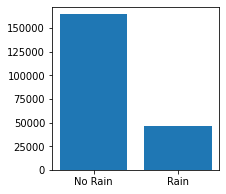

In [11]:
import matplotlib.pyplot as plt
import matplotlib.style as sty

plt.figure(figsize=(3,3))
plt.hist(y,bins=2,rwidth=0.8)
plt.xticks([0.25,0.75],['No Rain','Rain'])

print(y.value_counts())

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier(n_estimators = 20,random_state = 1)
rfClassifier.fit(x_train,y_train.values.ravel())
y_pred_RF = rfClassifier.predict(x_test)
print("Random Forest Classifier NB score: " , rfClassifier.score(x_test,y_test))

Random Forest Classifier NB score:  0.8226010500347903


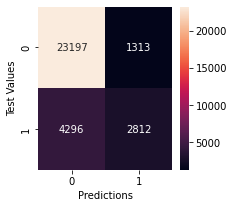

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confMatRF = confusion_matrix(y_test,y_pred_RF)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatRF,annot=True,fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()


In [14]:
print('Test Accuracy : %.3f'%rfClassifier.score(x_test, y_test)) 

Test Accuracy : 0.823


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_RF))

0.8226010500347903
